In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load Data

In [11]:
#data = load_breast_cancer()
#X = data.data
#y = data.target
data= pd.read_csv("d:/csv_files2/Classification/heart.csv")
X= data.iloc[:,:-1]
y= data.iloc[:,-1]

# Poly the data

In [12]:
poly = PolynomialFeatures( degree = 3 , include_bias = False)
poly.fit(X)
x_poly = poly.transform(X)

# Train and test spliting 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2,random_state=44)

# Logistic Regression Model and Fit It

In [31]:
LogisticRegressionModel= LogisticRegression(penalty='l2',C=2,solver='saga')
LogisticRegressionModel.fit(X_train,y_train)

D:\Anacoda33\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_predicted = LogisticRegressionModel.predict(X_test)
print("Y values predicted",y_predicted[:5])
print("Y values predicted",y_test[:5])

Y values predicted [1 1 1 1 1]
Y values predicted 94     1
54     1
261    0
172    0
44     1
Name: target, dtype: int64


# metrics the score of Model Logstic Regression

In [33]:
print("LOgisstic Regression train score",LogisticRegressionModel.score(X_train,y_train))
print("LOgisstic Regression test score",LogisticRegressionModel.score(X_test,y_test))
print("confusion matrix",confusion_matrix(y_predicted,y_test))
print("accurcy score",accuracy_score(y_predicted,y_test))

LOgisstic Regression train score 0.6611570247933884
LOgisstic Regression test score 0.7868852459016393
confusion matrix [[19  4]
 [ 9 29]]
accurcy score 0.7868852459016393


# SVC Model And fit 

D:\Anacoda33\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.0001, verbose=False)
accuracy = 0.5409836065573771
confusion matrix 
 [[ 0 28]
 [ 0 33]]


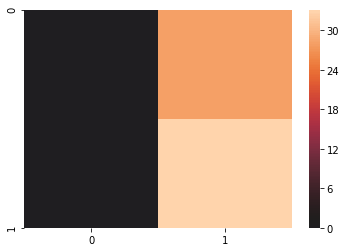

In [23]:

classifier = SVC(C = 0.9 , degree = 5 , tol = 0.0001, kernel='rbf')
classifier
print(classifier.fit(X_train , y_train))
result= classifier.predict(X_test)
print('accuracy =',accuracy_score(y_test , result))
 
cm = confusion_matrix(y_test , result)
print('confusion matrix \n',  cm)


sns.heatmap(cm, center=True)
plt.show()

